<a href="https://colab.research.google.com/github/PolinaZasheva/Whats-For-Breakfast/blob/master/food_train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

1.14.0
/device:GPU:0


In [0]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [0]:
# Uploaded train and test data into Google Drive
os.listdir('./gdrive/My Drive/food_data/')

['test', 'train']

In [0]:
base_dir = '/content/gdrive/My Drive/food_data/'
train_data_dir = base_dir + 'train'
validation_data_dir = base_dir + 'test'

# Location to save the models and log
best_model = base_dir+'best_model_3class.hdf5'
model_trained = base_dir +'model_trained_3class.hdf5'
history_log = base_dir +'history_3class.log'


In [0]:
# Use Inceptionv3 pretrained model
K.clear_session()
n_classes = 9
img_width, img_height = 299, 299
nb_train_samples =6930# 2250 #75750
nb_validation_samples =2930# 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(rate=0.2)(x)

predictions = Dense(9,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath=best_model, verbose=1, save_best_only=True)
csv_logger = CSVLogger(history_log)

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save(model_trained)

Found 6939 images belonging to 9 classes.
Found 2941 images belonging to 9 classes.
Epoch 1/30
432/433 [============================>.] - ETA: 3s - loss: 2.1420 - acc: 0.2563
Epoch 00001: val_loss improved from inf to 1.85855, saving model to /content/gdrive/My Drive/food_data/best_model_3class.hdf5
433/433 [==============================] - 2350s 5s/step - loss: 2.1420 - acc: 0.2562 - val_loss: 1.8586 - val_acc: 0.4614
Epoch 2/30
432/433 [============================>.] - ETA: 0s - loss: 1.6973 - acc: 0.4883
Epoch 00002: val_loss improved from 1.85855 to 1.40696, saving model to /content/gdrive/My Drive/food_data/best_model_3class.hdf5
433/433 [==============================] - 201s 465ms/step - loss: 1.6972 - acc: 0.4885 - val_loss: 1.4070 - val_acc: 0.5782
Epoch 3/30
432/433 [============================>.] - ETA: 0s - loss: 1.3346 - acc: 0.6011
Epoch 00003: val_loss improved from 1.40696 to 1.13793, saving model to /content/gdrive/My Drive/food_data/best_model_3class.hdf5
433/433 [

In [0]:
class_map_3 = train_generator.class_indices
class_map_3

{'Not_Breakfast': 0,
 'breakfast_burrito': 1,
 'deviled_eggs': 2,
 'donuts': 3,
 'french_toast': 4,
 'huevos_rancheros': 5,
 'omelette': 6,
 'pancakes': 7,
 'waffles': 8}

In [0]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


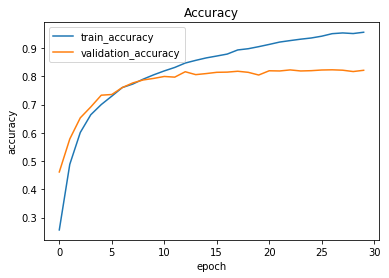

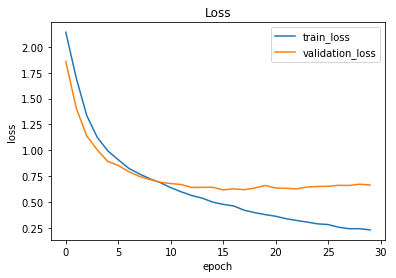

In [0]:
plot_accuracy(history,'Accuracy')
plot_loss(history,'Loss')